# Predicting house prices

In [650]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [651]:
import csv
import os

# CSV file
file_path = os.path.expanduser("~/Desktop/housing.csv")

In [652]:
# Open the CSV file
with open(file_path, newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    
    headers = next(csv_reader)
    
    data = pd.DataFrame(csv_reader, columns=headers)

In [653]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [654]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   longitude           20640 non-null  object
 1   latitude            20640 non-null  object
 2   housing_median_age  20640 non-null  object
 3   total_rooms         20640 non-null  object
 4   total_bedrooms      20640 non-null  object
 5   population          20640 non-null  object
 6   households          20640 non-null  object
 7   median_income       20640 non-null  object
 8   median_house_value  20640 non-null  object
 9   ocean_proximity     20640 non-null  object
dtypes: object(10)
memory usage: 1.6+ MB


In [655]:
# Object to float64
columns_to_convert = data.columns[:9]

data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [656]:
from sklearn.model_selection import train_test_split

In [657]:
x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [658]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [659]:
train_data = x_train.join(y_train)

In [660]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12254,-116.99,33.77,7.0,10352.0,2007.0,3559.0,1689.0,2.2925,INLAND,113100.0
19745,-122.35,40.25,10.0,1621.0,318.0,866.0,283.0,3.5000,INLAND,104300.0
15150,-116.84,32.92,20.0,1066.0,219.0,536.0,173.0,3.1607,<1H OCEAN,119300.0
19278,-122.72,38.43,31.0,2020.0,476.0,1408.0,437.0,2.5735,<1H OCEAN,131100.0
12619,-121.54,38.51,17.0,8482.0,1590.0,3362.0,1513.0,4.2216,INLAND,217900.0
...,...,...,...,...,...,...,...,...,...,...
3004,-119.01,35.30,7.0,8596.0,1597.0,4893.0,1520.0,3.9054,INLAND,80900.0
13863,-117.28,34.41,14.0,2105.0,396.0,960.0,396.0,2.9934,INLAND,118200.0
3824,-118.47,34.19,33.0,3879.0,943.0,2113.0,843.0,3.8920,<1H OCEAN,292900.0
6733,-118.09,34.12,45.0,2966.0,415.0,1231.0,409.0,7.8347,<1H OCEAN,500001.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

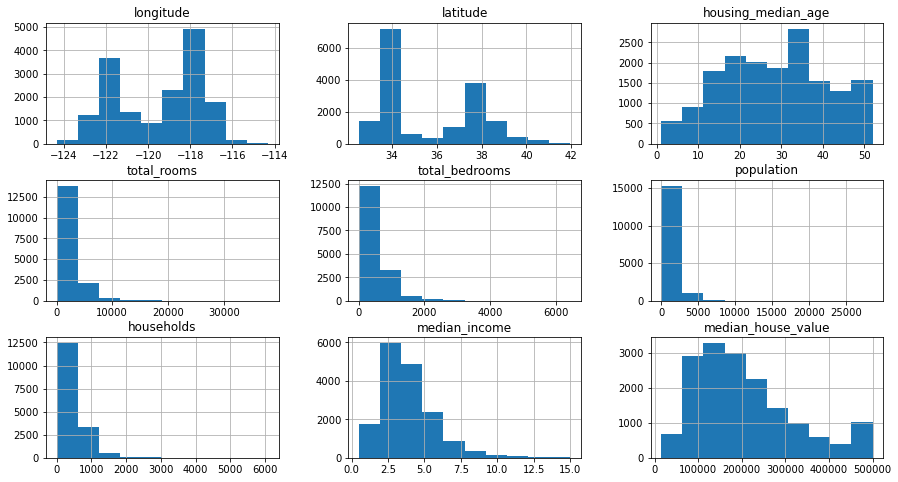

In [661]:
train_data.hist(figsize =(15,8))

<AxesSubplot:>

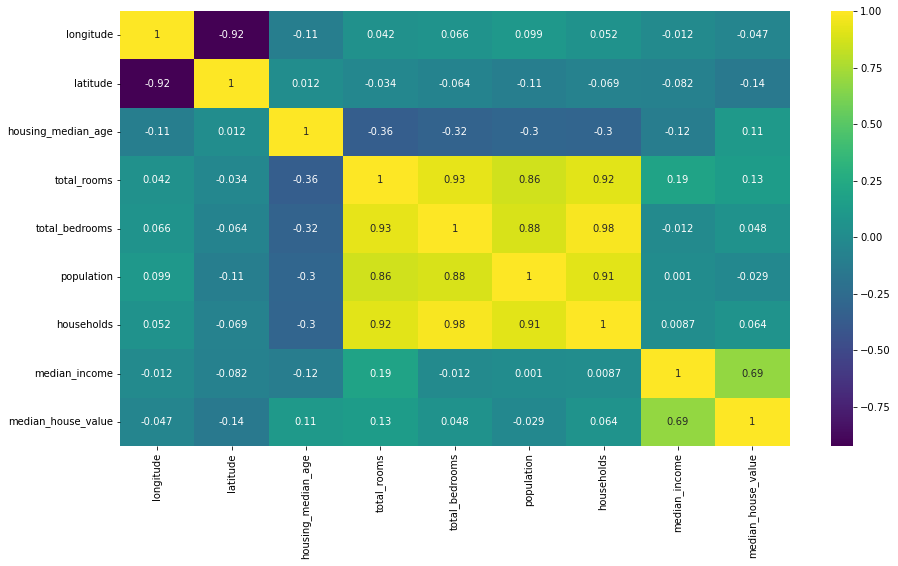

In [662]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap ='viridis')

In [663]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_rooms']+1)
train_data['population']=np.log(train_data['total_rooms']+1)
train_data['households']=np.log(train_data['total_rooms']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

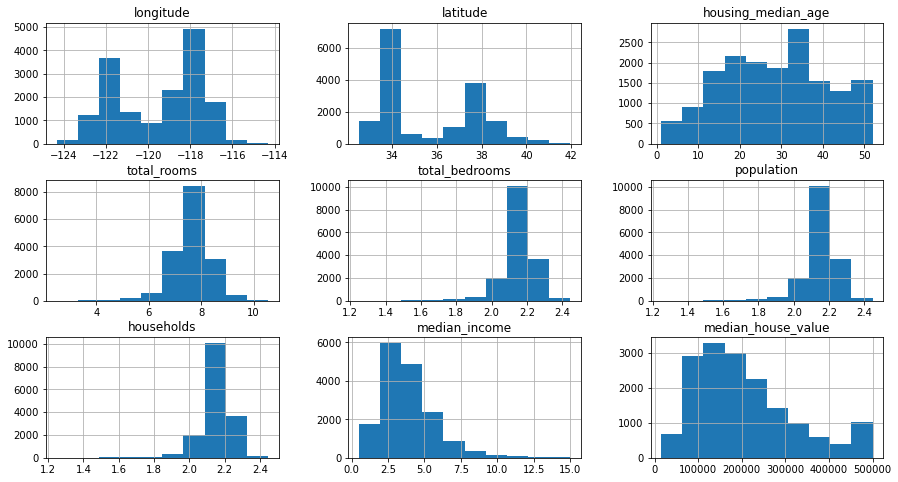

In [664]:
train_data.hist(figsize=(15,8))

In [665]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7260
INLAND        5252
NEAR OCEAN    2140
NEAR BAY      1857
ISLAND           3
Name: ocean_proximity, dtype: int64

In [666]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [667]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12254,-116.99,33.77,7.0,9.245032,2.326793,2.326793,2.326793,2.2925,113100.0,0,1,0,0,0
19745,-122.35,40.25,10.0,7.391415,2.127209,2.127209,2.127209,3.5000,104300.0,0,1,0,0,0
15150,-116.84,32.92,20.0,6.972606,2.076011,2.076011,2.076011,3.1607,119300.0,1,0,0,0,0
19278,-122.72,38.43,31.0,7.611348,2.153081,2.153081,2.153081,2.5735,131100.0,1,0,0,0,0
12619,-121.54,38.51,17.0,9.045819,2.307157,2.307157,2.307157,4.2216,217900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,-119.01,35.30,7.0,9.059169,2.308485,2.308485,2.308485,3.9054,80900.0,0,1,0,0,0
13863,-117.28,34.41,14.0,7.652546,2.157854,2.157854,2.157854,2.9934,118200.0,0,1,0,0,0
3824,-118.47,34.19,33.0,8.263590,2.226092,2.226092,2.226092,3.8920,292900.0,1,0,0,0,0
6733,-118.09,34.12,45.0,7.995307,2.196703,2.196703,2.196703,7.8347,500001.0,1,0,0,0,0


<AxesSubplot:>

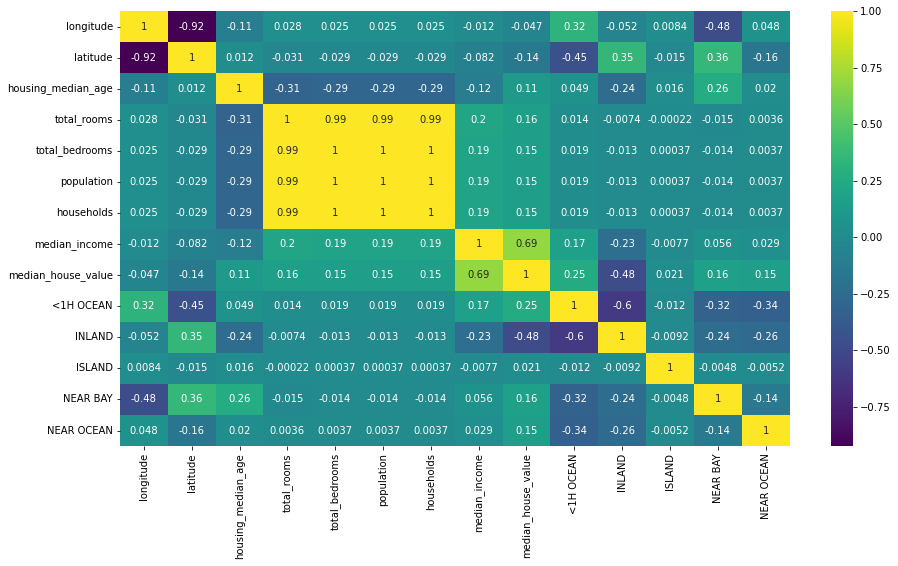

In [668]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap ='viridis')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

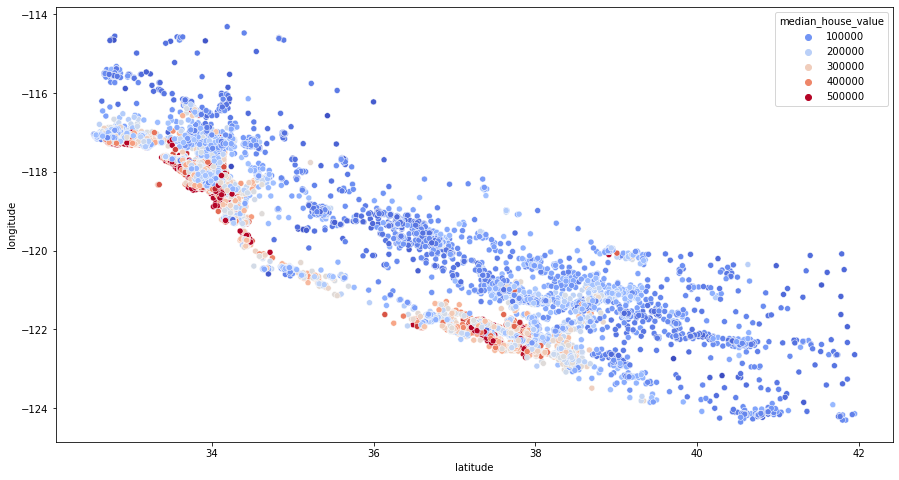

In [669]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [670]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot:>

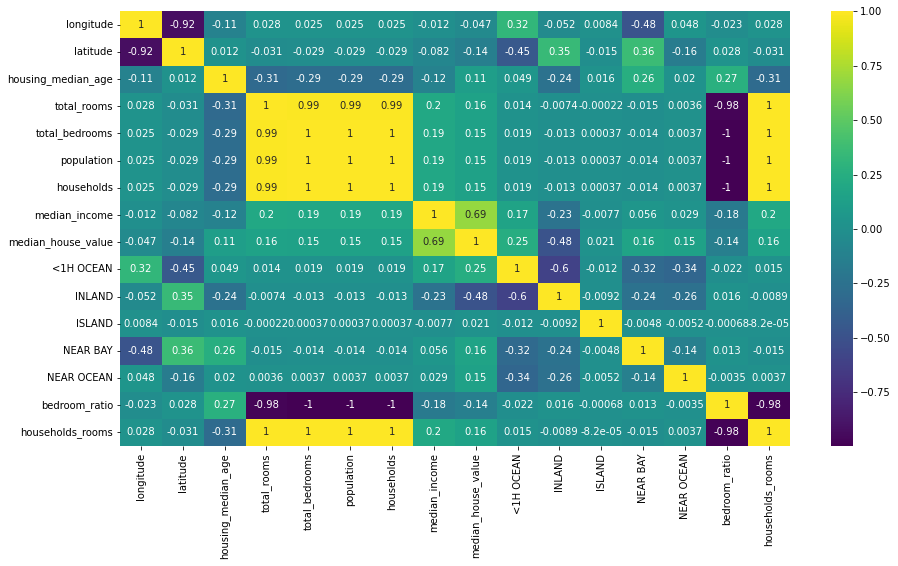

In [671]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap ='viridis')

In [672]:
test_data = x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_rooms']+1)
test_data['population']=np.log(test_data['total_rooms']+1)
test_data['households']=np.log(test_data['total_rooms']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']

In [673]:
x_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [674]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_rooms
13981,-117.46,34.85,7.0,9.186048,2.321019,2.321019,2.321019,3.4912,0,1,0,0,0,0.252668,3.957765
15166,-117.05,32.95,17.0,8.019613,2.199401,2.199401,2.199401,3.9531,1,0,0,0,0,0.274253,3.646271
12099,-117.32,33.96,19.0,8.076205,2.205656,2.205656,2.205656,3.7585,0,1,0,0,0,0.273106,3.661588
1858,-124.16,41.74,15.0,7.906915,2.186828,2.186828,2.186828,2.1829,0,0,0,0,1,0.276572,3.615701
16533,-121.18,37.79,16.0,7.190676,2.102996,2.102996,2.102996,1.9464,0,1,0,0,0,0.292462,3.419253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12669,-121.45,38.48,24.0,7.477038,2.137361,2.137361,2.137361,3.5402,0,1,0,0,0,0.285857,3.498257
11225,-117.94,33.81,34.0,7.163172,2.099633,2.099633,2.099633,5.8461,1,0,0,0,0,0.293115,3.411631
6138,-117.97,34.08,30.0,7.708860,2.164341,2.164341,2.164341,3.3261,0,1,0,0,0,0.280760,3.561759
18289,-122.11,37.38,22.0,8.199464,2.219145,2.219145,2.219145,5.0804,0,0,0,1,0,0.270645,3.694875


In [675]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

reg = LinearRegression()

In [676]:
reg.fit(x_train, y_train)

LinearRegression()

In [677]:
reg.score(x_test, y_test)

0.5842995275218783

In [678]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_test_s = scaler.fit_transform(x_test)

In [680]:
reg.fit(x_test_s, y_test)

LinearRegression()

In [682]:
reg.score(x_test_s, y_test)

0.6201288245645877

# Random Forrest 

In [688]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [689]:
forest.score(x_test, y_test)

0.8171408361274672

In [691]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [3,10,30],
    'max_features': [2,4,6,8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [694]:
best_forest = grid_search.best_estimator_

In [695]:
best_forest.score(x_test, y_test)

0.8115250452125217